# Cats And Dogs Classification  🐕 🐈

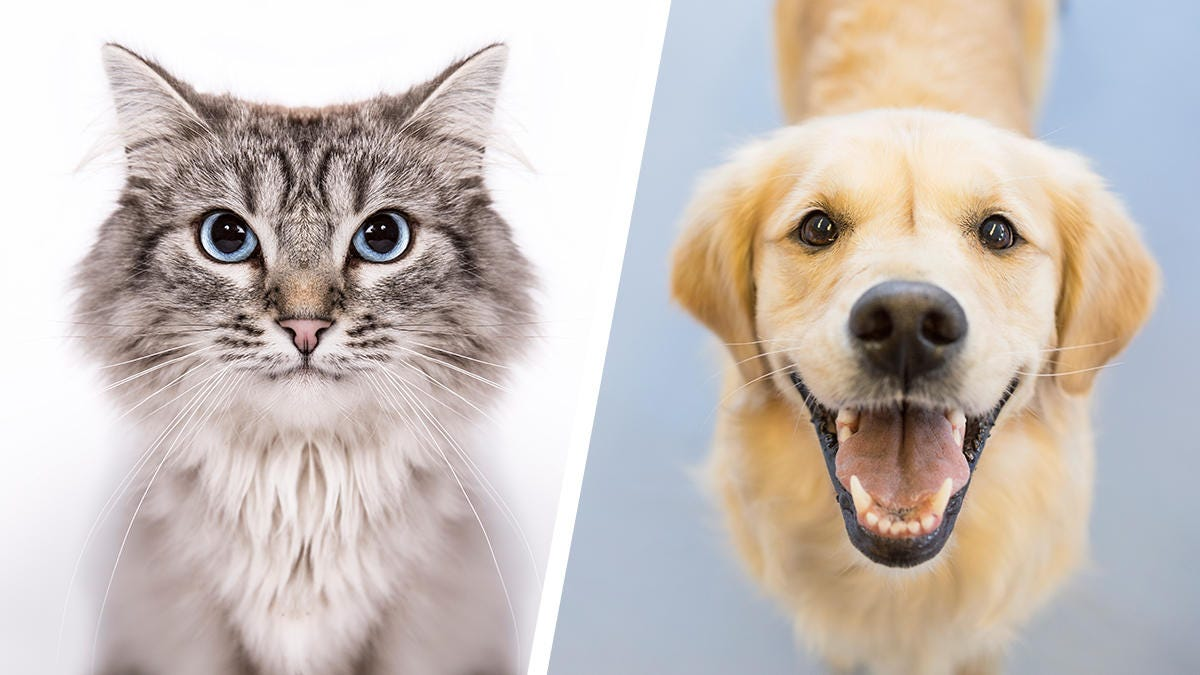

## About the Dataset

The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat).

## Objective

**implement a support vector machine (SVM) to classify images of cats and dogs**

## Importing libraries and DataSet

In [49]:
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import joblib
from sklearn.model_selection import GridSearchCV
import cv2
import seaborn as sns
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

### Extracting the dataset

In [40]:
import zipfile
with zipfile.ZipFile('train.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')
with zipfile.ZipFile('test1.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

## Data Exploration

### Image class distribution

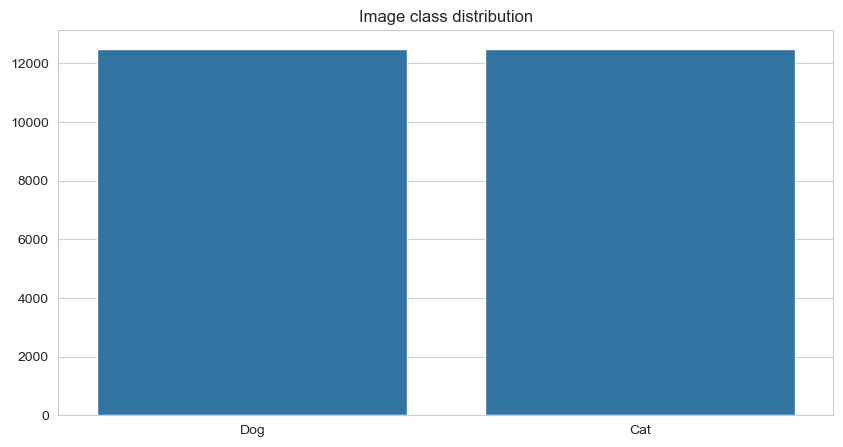

The precentage of dogs in the dataset is: 50.0% 
The precentage of cats in the dataset is:  50.0% 


In [54]:
# load the images
train_images = os.listdir('dataset/train')
# dog = 1, cat = 0
dog_count = 0
cat_count = 0
for image in train_images:
    if 'dog' in image:
        dog_count += 1
    else:
        cat_count += 1

plt.figure(figsize=(10, 5))
sns.barplot(x=['Dog', 'Cat'], y=[dog_count, cat_count])
plt.title('Image class distribution')
plt.show()
print(f"The precentage of dogs in the dataset is: {(dog_count / len(train_images)) * 100}% ")
print(f"The precentage of cats in the dataset is:  {(cat_count / len(train_images)) * 100}% ")

### Displaying some images

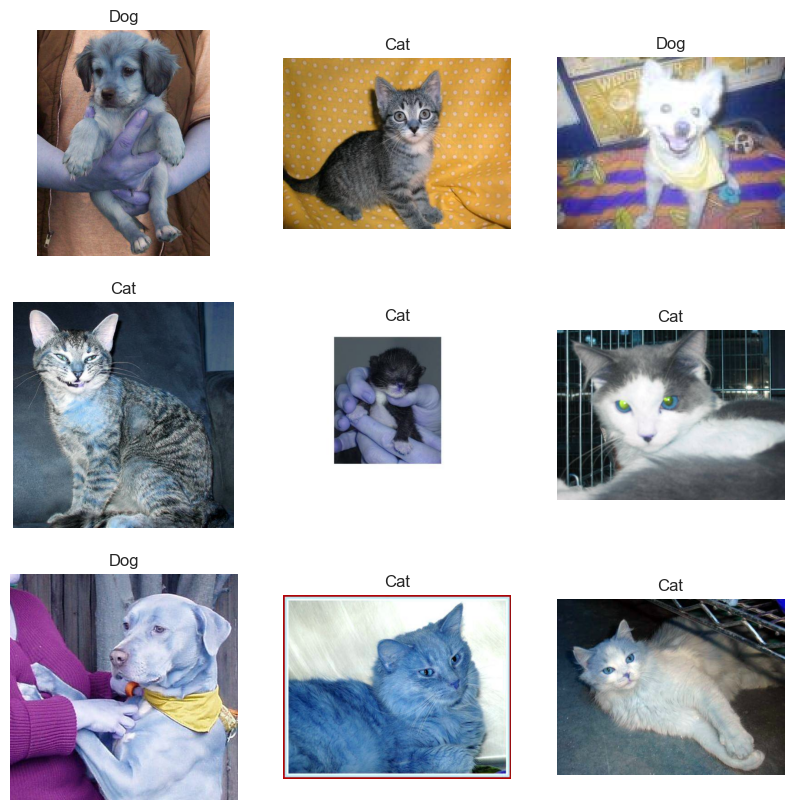

In [46]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    image = cv2.imread(f'dataset/train/{train_images[i]}')
    plt.imshow(image)
    if 'dog' in train_images[i]:
        plt.title('Dog')
    else:
        plt.title('Cat')
    plt.axis('off')
plt.show()

From the visual representation, we can observe that our dataset is perfectly balanced. Both cats and dogs have an equal number of images, specifically 12,500 each, constituting 50% of the dataset for each class.

Having a balanced dataset means we don't need to worry about one class being overrepresented, which could lead to biases in our machine learning model. This sets a solid foundation for training our models!

## Data preprocessing

### Dimensions Scalling  and Normalization

Scaling images is an essential preprocessing step when building a classifier model for several reasons:

* Computational Efficiency
* Uniformity of Features
* Generalization
* Regularization
* Reduced Data Redundancy

In [41]:
# Load the images
# dog = 1, cat = 0
train_images = os.listdir('dataset/train')
features = []
labels = []
image_size = (50, 50)

# Process the images
for image in tqdm(train_images, desc='Processing images'):
    if 'dog' in image:
        label = 1
    else:
        label = 0

    image_read = cv2.imread(f'dataset/train/{image}', cv2.IMREAD_GRAYSCALE)
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    image_flattened = image_normalized.flatten()
    features.append(image_flattened)
    labels.append(label)

Processing images: 100%|██████████| 25000/25000 [00:21<00:00, 1185.07it/s]


### Splitting the dataset

In [ ]:
features = np.array(features)
labels = np.array(labels)

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, shuffle=True)

del features
del labels
del train_images


## Model Building

In [ ]:
n_components = 0.8
pca = PCA(n_components=n_components, whiten=True)
svm = SVC()
pca = PCA(n_components=n_components, random_state=42)
pipe = Pipeline(steps=[('pca', pca), ('svm', svm)])

### Hyperparameter Tuning

In [ ]:
param_grid = {
    'pca__n_components': [0.9],
    'svm__kernel': ['rbf']
}

### Training the model

In [ ]:
start_time = time.time()
grid_search = GridSearchCV(pipe, param_grid, cv=3, verbose=4)
grid_search.fit(x_train, y_train)
print(f'--- {time.time() - start_time} seconds ---')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END pca__n_components=0.9, svm__kernel=rbf;, score=0.661 total time= 1.7min
[CV 2/3] END pca__n_components=0.9, svm__kernel=rbf;, score=0.649 total time= 1.6min
[CV 3/3] END pca__n_components=0.9, svm__kernel=rbf;, score=0.648 total time= 1.6min
--- 456.7216799259186 seconds ---


In [ ]:
del x_train
del y_train

### Model Evaluation

In [ ]:
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'pca__n_components': 0.9, 'svm__kernel': 'rbf'}
Best Score:  0.6528997507520363


### Model Testing

In [56]:
y_pred = best_pipeline.predict(x_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1616  856]
 [ 876 1652]]


In [ ]:
accuracy = best_pipeline.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6536


### Classification Report

In [57]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      2472
           1       0.66      0.65      0.66      2528

    accuracy                           0.65      5000
   macro avg       0.65      0.65      0.65      5000
weighted avg       0.65      0.65      0.65      5000


# Thank you ❤️❤️